<a href="https://colab.research.google.com/github/YaMUdreC/Ml-and-nn-colab/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_%E2%80%93_%D0%9D%D0%B5%D0%B8%CC%86%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%D0%91%D1%83%D0%B4%D0%BA%D0%BE%D0%B2_%D0%AF%D1%80%D0%BE%D1%81%D0%BB%D0%B0%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание № 2. Нейронные сети


**Работу выполнил (а):**

Будков Ярослав Антонович, 367934

## Прогнозирование цены на жилье с помощью нейросетевой регрессионной модели

Необходимо по имеющимся данным о ценах на жильё предсказать окончательную цену каждого дома с учетом характеристик домов с использованием нейронной сети. Описание набора данных  содержит 80 классов (набор переменых) классификации оценки типа жилья, и находится в файле `data_description.txt`.

В работе требуется дополнить раздел «Моделирование» в подразделе «Построение и обучение модели» создать и инициализировать последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow. Скомпилировать нейронную сеть выбрав функцию потерь и оптимизатор соответственно. Оценить точность полученных результатов. Вывести предсказанные данные о продаже.


### Импорт библиотек
Импортируем необходимые библиотеки:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Считываем набор данных


Загрузим набор данных и присвоим следующими переменные:

* `train_data`: данные, используемые для обучения модели
* `test_data`: данные, используемые для проверки модели

In [ ]:
train_data = pd.read_csv('/content/data/train.csv')
test_data = pd.read_csv('/content/data/test.csv')

## Подготовка данных
### Отобразим обучающие и проверочные данные:

In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Как можно видеть, `train_data` имеет на один столбец больше, чем `test_data`, это столбец `SalePrice`, для обучения модели перед применением ее для предсказания меток в test_data.

### Проверяем нет ли тестовые данные пустых значений значений (Nan)

Построим функцию `def missing_value_checker` для проверки и подсчёта пропущеных значений в test_data. А также выведем тип данных этих значений.


In [ ]:
def missing_value_checker(data):
    list = []
    for feature, content in data.items():
        if data[feature].isnull().values.any():

            sum = data[feature].isna().sum()

            type = data[feature].dtype

            print (f'{feature}: {sum}, type: {type}')

            list.append(feature)
    print(list)

    print(len(list))

missing_value_checker(test_data)

MSZoning: 4, type: object
LotFrontage: 227, type: float64
Alley: 1352, type: object
Utilities: 2, type: object
Exterior1st: 1, type: object
Exterior2nd: 1, type: object
MasVnrType: 894, type: object
MasVnrArea: 15, type: float64
BsmtQual: 44, type: object
BsmtCond: 45, type: object
BsmtExposure: 44, type: object
BsmtFinType1: 42, type: object
BsmtFinSF1: 1, type: float64
BsmtFinType2: 42, type: object
BsmtFinSF2: 1, type: float64
BsmtUnfSF: 1, type: float64
TotalBsmtSF: 1, type: float64
BsmtFullBath: 2, type: float64
BsmtHalfBath: 2, type: float64
KitchenQual: 1, type: object
Functional: 2, type: object
FireplaceQu: 730, type: object
GarageType: 76, type: object
GarageYrBlt: 78, type: float64
GarageFinish: 78, type: object
GarageCars: 1, type: float64
GarageArea: 1, type: float64
GarageQual: 78, type: object
GarageCond: 78, type: object
PoolQC: 1456, type: object
Fence: 1169, type: object
MiscFeature: 1408, type: object
SaleType: 1, type: object
['MSZoning', 'LotFrontage', 'Alley', 'Ut

Проверяем какие признаки в таблице можно оставить, а какие удалить. Если пропущенных значений слишком много, то удалим признак. Если их небольшое количество, то заполним `mean` или `median` для чисел, новая категория `missing` для строковых объектов.

В соответствии с этим:

– удалим ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'];

– заполним числовое отсутствующее значение значением `mean`;

– заполним строковое отсутствующее значение значением `missing`.

In [ ]:
test_edited = test_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)
train_edited = train_data.drop(['Alley','FireplaceQu','PoolQC', 'Fence', 'MiscFeature'], axis=1)

def nan_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            data[label] = content.fillna(content.median())
        else:
            data[label] = content.astype("category").cat.as_ordered()
            data[label] = pd.Categorical(content).codes+1

nan_filler(test_edited)
nan_filler(train_edited)

### Перепроверим наши данные:

In [ ]:
missing_value_checker(test_edited)

[]
0


In [ ]:
missing_value_checker(train_edited)

[]
0


In [ ]:
train_edited.shape, test_edited.shape

((1460, 76), (1459, 75))

In [ ]:
test_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int8   
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   int8   
 6   LotShape       1459 non-null   int8   
 7   LandContour    1459 non-null   int8   
 8   Utilities      1459 non-null   int8   
 9   LotConfig      1459 non-null   int8   
 10  LandSlope      1459 non-null   int8   
 11  Neighborhood   1459 non-null   int8   
 12  Condition1     1459 non-null   int8   
 13  Condition2     1459 non-null   int8   
 14  BldgType       1459 non-null   int8   
 15  HouseStyle     1459 non-null   int8   
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
train_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int8   
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int8   
 6   LotShape       1460 non-null   int8   
 7   LandContour    1460 non-null   int8   
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   int8   
 10  LandSlope      1460 non-null   int8   
 11  Neighborhood   1460 non-null   int8   
 12  Condition1     1460 non-null   int8   
 13  Condition2     1460 non-null   int8   
 14  BldgType       1460 non-null   int8   
 15  HouseStyle     1460 non-null   int8   
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Разделим данные

Поскольку мы не знаем метку (Цена) тестовых данных, для оценки модели, чтобы получить лучшую модель перед прогнозированием тестовых данных, разделим данные в файле train.scv на обучающие и проверочные данные, соотношение составляет 20%.

In [ ]:
import torch
X = train_edited.drop('SalePrice', axis=1)
y = train_edited['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
X_train = torch.from_numpy(X_train.values).float()
X_val = torch.from_numpy(X_val.values).float()
y_train = torch.from_numpy(y_train.values).float()
y_val = torch.from_numpy(y_val.values).float()

test_atts = torch.from_numpy(test_edited.values).float()

In [ ]:
test_atts.shape

torch.Size([1459, 75])

In [ ]:
X_train.shape, test_edited.shape

(torch.Size([1168, 75]), (1459, 75))

In [ ]:
X_train.shape, X_val.shape

(torch.Size([1168, 75]), torch.Size([292, 75]))

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Normalize X_train and X_val using StandardScaler
# scaler = StandardScaler()
# X_train = torch.from_numpy(scaler.fit_transform(X_train.numpy())).float()
# X_val = torch.from_numpy(scaler.transform(X_val.numpy())).float()

In [ ]:
from torch.utils.data import TensorDataset

z=75

X_train_reduced = X_train[:, :z]
X_val_reduced = X_val[:, :z]

test_atts_reduced = test_atts[:, :z]

train_dataset = TensorDataset(X_train_reduced, y_train)
val_dataset = TensorDataset(X_val_reduced, y_val)

In [ ]:
X_train.size(), y_train.size()

(torch.Size([1168, 75]), torch.Size([1168]))

## Моделирование

### Построение и обучение модели


Создайте последовательную модель нейронной сети с помощью фрэймворков тренировки нейронных сетей как: Torch или Tensorflow.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [ ]:
import torch
from torch import nn


class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers_stack = nn.Sequential(
            nn.Linear(z, 45),
            nn.ReLU(),
            nn.Linear(45, 25),
            nn.ReLU(),
            nn.Linear(25, 1),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.layers_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=75, out_features=45, bias=True)
    (1): ReLU()
    (2): Linear(in_features=45, out_features=25, bias=True)
    (3): ReLU()
    (4): Linear(in_features=25, out_features=1, bias=True)
  )
)


In [ ]:
num_epochs = 20
batch_size = 50
learning_rate = 0.01

In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
#model = torch.nn.Sequential(None)
# замените None на колличество входных полносвязных слоёв, колличество нейронов, колличество выходов
torch.manual_seed(40) #Для обеспечения воспроизводимости результатов устанавливается функция seed

In [ ]:
criterion = nn.MSELoss()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
def reset_weights(layer):
    if isinstance(layer, nn.Linear) or isinstance(layer, nn.Conv2d):
        layer.reset_parameters()

In [ ]:
import statistics
import math

In [ ]:
def train_loop(dataloader, model, criterion, optimizer):
    model.train()
    num_batches = len(dataloader)

    train_loss = 0


    for atts, prices in dataloader:



        # Compute prediction and loss
        pred = model(atts.to(device))
        loss = criterion(pred, prices.to(device).unsqueeze(1))
        # print(pred[0])
        # print(prices.to(device).unsqueeze(1)[0])
        # print("---")

        # Optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= num_batches

    print(f"Train loss: {int(train_loss)}")

    return train_loss


def test_loop(dataloader, model, criterion):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    test_loss, correct = 0, 0

    with torch.no_grad():
        for atts, prices in dataloader:
            # Compute prediction and loss
            pred = model(atts.to(device))
            loss = criterion(pred, prices.to(device).unsqueeze(1))


            test_loss += loss.item()
            # correct += (
            #     (pred.argmax(1) == prices.to(device)).type(torch.float).sum().item()
            # )



    test_loss /= num_batches

    correct /= size

    print(f"Test loss: {int(test_loss)} \n")

    return test_loss

Скомпилируйте нейронную сеть, выбрав функцию потерь и оптимизатор соответственно.

In [ ]:

model.compile() #Для оценки потерь и метрики рекомендую использовать метрики и функции потерь для регрессии.

Обучите модель на обучающих данных `X_train` и `y_train` задав гиперпараметры вашей модели нейронной сети, например количество эпох (epochs), размер мини-выборки (batch_size) и другие.

In [ ]:
#history = model.fit(X_train, y_train, None) #замените None на гиперпараметры вашей модели нейронной сети

In [ ]:
import torch._dynamo
torch._dynamo.config.suppress_errors = True

In [ ]:
# for plotting
loss_history = {"train": [], "test": []}

for i in range(num_epochs):
    print(f"Epoch {i+1}")
    train_loss = train_loop(train_dataloader, model, criterion, optimizer)
    test_loss = test_loop(test_dataloader, model, criterion)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print("Done!")

Epoch 1


W1126 19:32:32.560000 885 torch/_dynamo/convert_frame.py:1125] WON'T CONVERT forward <ipython-input-517-eac33385bff0> line 17 
W1126 19:32:32.560000 885 torch/_dynamo/convert_frame.py:1125] due to: 
W1126 19:32:32.560000 885 torch/_dynamo/convert_frame.py:1125] Traceback (most recent call last):
W1126 19:32:32.560000 885 torch/_dynamo/convert_frame.py:1125]   File "/usr/local/lib/python3.10/dist-packages/torch/_dynamo/output_graph.py", line 1446, in _call_user_compiler
W1126 19:32:32.560000 885 torch/_dynamo/convert_frame.py:1125]     compiled_fn = compiler_fn(gm, self.example_inputs())
W1126 19:32:32.560000 885 torch/_dynamo/convert_frame.py:1125]   File "/usr/local/lib/python3.10/dist-packages/torch/_dynamo/repro/after_dynamo.py", line 129, in __call__
W1126 19:32:32.560000 885 torch/_dynamo/convert_frame.py:1125]     compiled_gm = compiler_fn(gm, example_inputs)
W1126 19:32:32.560000 885 torch/_dynamo/convert_frame.py:1125]   File "/usr/local/lib/python3.10/dist-packages/torch/__ini

Train loss: 30139353408
Test loss: 10188996181 

Epoch 2
Train loss: 8833266410
Test loss: 8578073002 

Epoch 3
Train loss: 5432865482
Test loss: 7377985749 

Epoch 4
Train loss: 4320074997
Test loss: 5923678976 

Epoch 5
Train loss: 4020218256
Test loss: 5611729706 

Epoch 6
Train loss: 3371866240
Test loss: 4444688938 

Epoch 7
Train loss: 3131519802
Test loss: 4111045504 

Epoch 8
Train loss: 2769413434
Test loss: 3694286762 

Epoch 9
Train loss: 2587244832
Test loss: 3583501162 

Epoch 10
Train loss: 2348212560
Test loss: 3496904874 

Epoch 11
Train loss: 2121059210
Test loss: 3189004608 

Epoch 12
Train loss: 1960573586
Test loss: 3272054037 

Epoch 13
Train loss: 1835418754
Test loss: 3491546453 

Epoch 14
Train loss: 1693655736
Test loss: 3452757696 

Epoch 15
Train loss: 1613810722
Test loss: 3604398250 

Epoch 16
Train loss: 1609041518
Test loss: 3757003562 

Epoch 17
Train loss: 1588018258
Test loss: 3621088085 

Epoch 18
Train loss: 1600473946
Test loss: 3815684416 

Epoch 1

In [ ]:
# loss_history

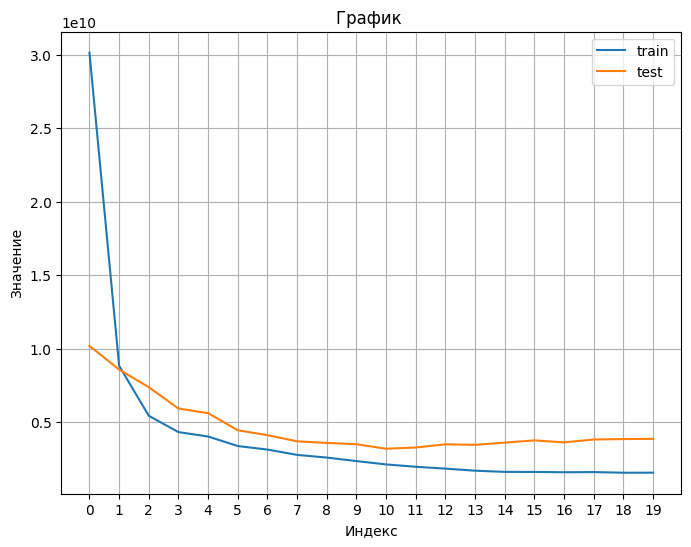

In [ ]:
# # Построение графика
plt.figure(figsize=(8, 6))

plt.plot(loss_history["train"], label='train')
plt.plot(loss_history["test"], label='test')

plt.xticks(range(0, num_epochs))

# Настройка графика
plt.title('График ')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
criterion = nn.L1Loss()

In [ ]:
model.apply(reset_weights)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=75, out_features=45, bias=True)
    (1): ReLU()
    (2): Linear(in_features=45, out_features=25, bias=True)
    (3): ReLU()
    (4): Linear(in_features=25, out_features=1, bias=True)
  )
)

In [ ]:
# for plotting
loss_history = {"train": [], "test": []}

for i in range(num_epochs):
    print(f"Epoch {i+1}")
    train_loss = train_loop(train_dataloader, model, criterion, optimizer)
    test_loss = test_loop(test_dataloader, model, criterion)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print("Done!")

Epoch 1
Train loss: 121766
Test loss: 64996 

Epoch 2
Train loss: 49773
Test loss: 49900 

Epoch 3
Train loss: 41039
Test loss: 42824 

Epoch 4
Train loss: 35064
Test loss: 39900 

Epoch 5
Train loss: 32115
Test loss: 35198 

Epoch 6
Train loss: 29702
Test loss: 33921 

Epoch 7
Train loss: 29044
Test loss: 33052 

Epoch 8
Train loss: 27928
Test loss: 32532 

Epoch 9
Train loss: 26990
Test loss: 32106 

Epoch 10
Train loss: 26912
Test loss: 31825 

Epoch 11
Train loss: 26385
Test loss: 32368 

Epoch 12
Train loss: 26236
Test loss: 32038 

Epoch 13
Train loss: 27373
Test loss: 31763 

Epoch 14
Train loss: 26219
Test loss: 31514 

Epoch 15
Train loss: 25891
Test loss: 31615 

Epoch 16
Train loss: 26338
Test loss: 31442 

Epoch 17
Train loss: 25690
Test loss: 31158 

Epoch 18
Train loss: 25526
Test loss: 31645 

Epoch 19
Train loss: 25544
Test loss: 30815 

Epoch 20
Train loss: 25528
Test loss: 32178 

Done!


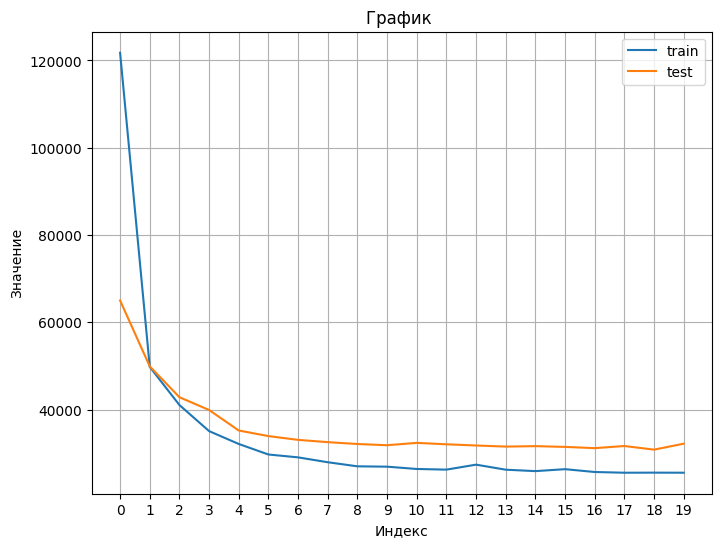

In [ ]:
# # Построение графика
plt.figure(figsize=(8, 6))

plt.plot(loss_history["train"], label='train')
plt.plot(loss_history["test"], label='test')

plt.xticks(range(0, num_epochs))

# Настройка графика
plt.title('График ')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
model.apply(reset_weights)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=75, out_features=45, bias=True)
    (1): ReLU()
    (2): Linear(in_features=45, out_features=25, bias=True)
    (3): ReLU()
    (4): Linear(in_features=25, out_features=1, bias=True)
  )
)

In [ ]:
# for plotting
loss_history = {"train": [], "test": []}

for i in range(num_epochs):
    print(f"Epoch {i+1}")
    train_loss = train_loop(train_dataloader, model, criterion, optimizer)
    test_loss = test_loop(test_dataloader, model, criterion)

    loss_history["train"].append(train_loss)
    loss_history["test"].append(test_loss)
print("Done!")

Epoch 1
Train loss: 3395912878702368
Test loss: 178639 

Epoch 2
Train loss: 180497
Test loss: 178639 

Epoch 3
Train loss: 182090
Test loss: 178638 

Epoch 4
Train loss: 181102
Test loss: 178638 

Epoch 5
Train loss: 181245
Test loss: 178638 

Epoch 6
Train loss: 181254
Test loss: 178638 

Epoch 7
Train loss: 181302
Test loss: 178637 

Epoch 8
Train loss: 182121
Test loss: 178637 

Epoch 9
Train loss: 181099
Test loss: 178637 

Epoch 10
Train loss: 181442
Test loss: 178637 

Epoch 11
Train loss: 180953
Test loss: 178636 

Epoch 12
Train loss: 181148
Test loss: 178636 

Epoch 13
Train loss: 181690
Test loss: 178636 

Epoch 14
Train loss: 181174
Test loss: 178636 

Epoch 15
Train loss: 181424
Test loss: 178635 

Epoch 16
Train loss: 181236
Test loss: 178635 

Epoch 17
Train loss: 181997
Test loss: 178635 

Epoch 18
Train loss: 181279
Test loss: 178635 

Epoch 19
Train loss: 181396
Test loss: 178635 

Epoch 20
Train loss: 181548
Test loss: 178634 

Done!


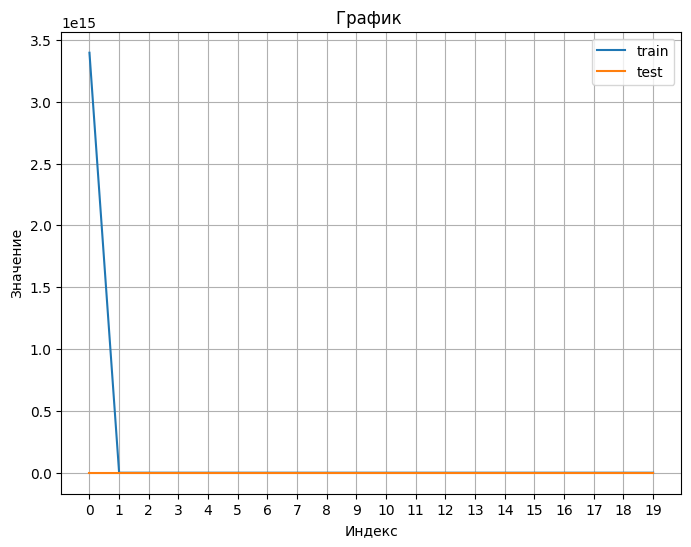

In [ ]:
# # Построение графика
plt.figure(figsize=(8, 6))

plt.plot(loss_history["train"], label='train')
plt.plot(loss_history["test"], label='test')

plt.xticks(range(0, num_epochs))

# Настройка графика
plt.title('График ')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()

**Оцените полученные результаты**

### Прогнозирование

In [ ]:
model.eval()
with torch.no_grad():
        for atts in test_atts_reduced:

            # Compute prediction and loss
            preds = model(test_atts_reduced.to(device))


preds

tensor([[4.7043],
        [4.7043],
        [4.7043],
        ...,
        [4.7043],
        [4.7043],
        [4.7043]], device='cuda:0')

In [ ]:
#пример
output = pd.DataFrame(
{
    'Id':test_data['Id'],
    'SalePrice': np.squeeze(preds.cpu())
})
output


,Id,SalePrice
0,1461,4.704299
1,1462,4.704299
2,1463,4.704299
3,1464,4.704299
4,1465,4.704299
...,...,...
1454,2915,4.704299
1455,2916,4.704299
1456,2917,4.704299
1457,2918,4.704299


## Задание


В задние представлено логика выполнения с использование tensorflow/keras. Выполнять можно как с использованием tensorflow/keras, так и pytorch.


**При выполнении:**

Выведите отчет нейросетевой регрессионной модели, для  прогнозирование цены на жилье.

---

В ходе практической работы нейросетевая модель действително показала, что может обучиться, имея лишь небольшую ошибку с ожидаемой ценой в большинстве случаев.

---
---

Подберите  разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Попробуйте использовать разное количество нейронов на входном слое. Опишите достигнутый результат.

---

Большее количество нейронов на входнос лое, а значит и большее количество информации помоголо лучше обучить модель.

---
---

Добавьте в нейронную сеть скрытый слой с разным количеством нейронов.

---

Разница оказалась довольно небольшой, хоть один слой, хоть два.

---
---

Используйте разное количество эпох. Опишите достигнутый результат.

---

Сперва мы видим сильное улучшение работы модели, но после неторого небольшого количества эпох разница ошибки становится все меньше и меньше, скорее напоминая плато.

---
---

Используйте разные размеры мини-выборки (batch_size). Опишите достигнутый результат.

---

Для мини-выборки batch_size я провел несколько результатов, выбрав число 100 как удовлетворительное. Сложно точно сказать какое количество будет наилучшим, так как мы не хотим слишком усложнять программу, при этом хотим провести несколько тестов в течениии одной итерации для оптимального поиска коэффицентов.

---
---

Попробуйте использовать разные значения оптимизатора `optimizers` и функции потерь `loss`. Сравните полученные результаты.

---

Я заметил, что при использовании функции потерь L1 результат получается лучше, чем при использовании MSE, сравнить мы можем взять корень из итогого значения MSE.

Для оптимизатора Adam показал результат лучше, чем SGD.

---

**Вопросы:**

**Как выше перечисленные параметры влияют на полученный вами результат?**

Все эти параметры влияют на скорость получения примерно одного и того же результата. В зависимости от выборов параметров, конечно, нейронная сеть по разному реагирует на различные данные, что влияет на результат.

---

**Что такое эпоха (Epoch)? В чем отличие от итерации (Iteration)?**

Эпоха - цикл из 10 итераций, в которых проходит обучение и промежуточная оценка по всем данным.

---

**Что такое функция активации? Какие вам известны? Как и зачем используются в нейронной сети?**

Функцией активации является пороговый потенциал, только после достижения которого происходит возбуждение (активация) нейрона и, как следствие, распространение сигнала далее по нейронной сети.

Существуют: Sigmoid, ReLU, Leaky ReLU, ELU, tanh, Maxout и другие.

Они нужны для введения нелинейности в выходные данные нейрона и ограничении параметра активности нейрона от 0 до 1.


---

**Что такое MSE(Mean Squared Error) - Средняя квадратичная ошибка? Что такое MAE(Mean Absolute Error)? Для чего используются.**

MSE - это средняя квадратическая ошибка. Применяется преимущественно при решении задач регрессии, когда модель предсказывает вещественное число. Результат всегда положительный, независимо от знака предсказанных и истинных значений, и идеальное значение равно 0.0


Преимущество: Использование MSE в качестве функции потерь даёт основания ожидать, что обученная с ней модель не имеет сильных "выбросов" в величине ошибки. Любой большой выброс в невязке  |Yi^−Yi|⋙0  при вычислении MSE был бы возведён в квадрат и дал бы вовсе огромный вклад в итоговое значение функции потерь.
Недостаток: Как логично следует из описанного выше преимущества MSE, данная функция потерь в первую очередь сильно штрафует модель за наличие выбросов в предсказаниях. Для ряда практически важных задач, тем не менее, важнее оказывается наиболее высокая точность работы на абсолютном большинстве входных примеров, нежели отсутствие одиночных выбросов.


MAE — это величина, которая измеряет среднюю по всем образцам величину невязки  |Yi^−Yi| .

Также может применяться при решении задач регрессии

Преимущество: MAE не придаёт такого большого значения "выбросам", как MSE — все ошибки учитываются равнозначно в единой линейной шкале.
Недостаток: Недостаток применения MAE в качестве функции потерь при обучении модели напрямую вытекает из преимуществ. Обученная с MAE модель может показывать хорошие (или даже отличные) результаты в большинстве случаев, но на отдельных примерах может допускать большую ошибку.



---